<a href="https://colab.research.google.com/github/VincenzoLuna/Predicci-n-de-los-grados-Brix-del-mango-mediante-Machine-Learning/blob/main/RFR_and_SGBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler as MMS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as SGBR
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
display(pd.read_excel('DATA PRUEBA.xlsx'))

,Banda 1,Banda 2,Banda 3,Banda 4,Banda 5,Banda 6,Banda 7,Banda 8,Banda 9,Banda 10,...,Banda 231,Banda 232,Banda 233,Banda 234,Banda 235,Banda 236,Banda 237,Banda 238,Banda 239,Banda 240
0,576.341,509.507,452.667,402.025,361.519,332.101,292.955,259.007,228.425,205.057,...,4213.46,4218.78,4222.83,4211.41,4202.31,4191.96,4187.42,4163.14,4168.14,4151.20
1,915.661,878.002,863.898,841.258,813.905,766.037,702.313,637.286,567.594,499.209,...,4749.76,4741.28,4743.02,4733.94,4709.56,4703.51,4684.12,4671.73,4662.48,4642.65
2,927.261,923.318,937.764,944.430,922.200,891.480,821.104,750.120,678.284,596.901,...,4604.29,4607.92,4613.07,4612.59,4602.20,4583.63,4563.50,4552.31,4546.16,4540.35
3,699.206,653.953,620.563,601.133,549.275,517.729,468.993,418.461,376.486,335.452,...,4229.63,4223.52,4222.81,4212.09,4207.13,4198.39,4182.65,4173.88,4159.43,4160.96
4,669.578,623.477,553.575,514.384,461.305,420.422,374.268,312.997,272.091,238.400,...,3162.44,3158.62,3158.70,3152.19,3145.88,3128.03,3116.05,3103.47,3099.24,3094.62
5,625.024,560.926,514.178,473.920,430.681,400.081,357.625,318.558,287.354,263.884,...,4140.83,4149.64,4148.44,4141.67,4120.25,4104.59,4076.00,4064.94,4060.27,4045.37
6,695.128,601.858,531.126,464.264,403.265,357.730,305.553,260.375,224.066,197.906,...,3139.24,3160.48,3167.01,3164.91,3141.83,3127.48,3099.14,3092.24,3083.80,3083.74
7,976.855,928.682,916.400,864.693,831.203,778.323,717.486,652.482,594.476,534.672,...,4659.50,4654.33,4648.33,4637.40,4625.60,4611.63,4591.80,4588.71,4566.08,4567.42
8,792.333,741.371,702.711,670.245,630.144,580.269,524.187,471.549,424.196,376.640,...,4637.52,4637.40,4635.57,4629.58,4618.25,4606.91,4597.41,4587.18,4582.51,4570.43
9,837.334,751.888,696.201,623.039,564.596,517.354,465.299,400.633,359.503,323.239,...,3534.09,3531.89,3530.34,3510.48,3505.09,3486.98,3475.04,3470.17,3454.60,3444.59


In [ ]:
mangos_df = pd.read_excel('DATA MODELO.xlsx')
display(mangos_df)

,Mangos,Banda 1,Banda 2,Banda 3,Banda 4,Banda 5,Banda 6,Banda 7,Banda 8,Banda 9,...,Banda 233,Banda 234,Banda 235,Banda 236,Banda 237,Banda 238,Banda 239,Banda 240,Brix,Estado
0,1,626.076,579.849,506.845,462.092,408.753,369.939,323.891,270.200,232.037,...,2791.08,2791.27,2786.52,2771.07,2765.30,2753.51,2742.45,2734.04,7.9,No Maduro
1,2,615.260,579.379,501.610,460.970,422.049,377.674,326.156,285.999,252.657,...,3663.98,3663.14,3654.59,3642.94,3626.09,3620.50,3615.25,3607.92,7.9,No Maduro
2,3,782.474,748.101,694.113,671.739,633.956,600.651,550.643,486.231,430.967,...,3452.96,3443.75,3438.75,3424.04,3419.37,3411.91,3400.30,3389.64,19.0,Maduro
3,4,959.511,962.909,981.425,984.970,970.617,935.212,869.860,798.612,715.833,...,4472.01,4457.58,4447.63,4426.02,4411.89,4412.27,4392.55,4380.94,19.0,Maduro
4,5,982.863,990.991,1003.150,1017.730,1004.850,966.667,895.708,823.351,743.747,...,4638.51,4634.08,4624.25,4612.63,4596.68,4592.07,4582.65,4574.71,19.0,Maduro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,286,763.525,726.975,697.998,667.933,635.825,606.019,549.971,504.435,460.357,...,4777.30,4767.81,4758.74,4750.31,4742.29,4724.19,4723.97,4709.20,22.3,Maduro
286,287,682.446,607.491,569.459,521.800,482.259,444.790,396.522,355.922,318.865,...,3384.97,3375.02,3368.20,3358.63,3345.18,3338.74,3327.40,3325.51,8.3,No Maduro
287,288,767.801,747.272,712.792,688.672,649.688,607.682,556.990,508.700,456.474,...,4609.89,4594.30,4581.54,4571.01,4566.41,4553.95,4545.17,4537.84,8.3,No Maduro
288,289,1022.460,1035.100,1043.750,1049.260,1025.350,969.330,910.049,838.743,762.899,...,5245.38,5226.82,5222.56,5217.72,5218.99,5203.92,5193.91,5187.66,8.3,No Maduro


In [ ]:
X_df = mangos_df.drop(columns = ['Mangos','Brix'])
Y_df = mangos_df['Brix']
display(X_df)
display(Y_df)

,Banda 1,Banda 2,Banda 3,Banda 4,Banda 5,Banda 6,Banda 7,Banda 8,Banda 9,Banda 10,...,Banda 231,Banda 232,Banda 233,Banda 234,Banda 235,Banda 236,Banda 237,Banda 238,Banda 239,Banda 240
0,626.076,579.849,506.845,462.092,408.753,369.939,323.891,270.200,232.037,200.563,...,2794.04,2795.36,2791.08,2791.27,2786.52,2771.07,2765.30,2753.51,2742.45,2734.04
1,615.260,579.379,501.610,460.970,422.049,377.674,326.156,285.999,252.657,217.306,...,3651.58,3662.43,3663.98,3663.14,3654.59,3642.94,3626.09,3620.50,3615.25,3607.92
2,782.474,748.101,694.113,671.739,633.956,600.651,550.643,486.231,430.967,381.541,...,3470.25,3459.86,3452.96,3443.75,3438.75,3424.04,3419.37,3411.91,3400.30,3389.64
3,959.511,962.909,981.425,984.970,970.617,935.212,869.860,798.612,715.833,632.637,...,4482.14,4467.83,4472.01,4457.58,4447.63,4426.02,4411.89,4412.27,4392.55,4380.94
4,982.863,990.991,1003.150,1017.730,1004.850,966.667,895.708,823.351,743.747,653.021,...,4643.03,4639.57,4638.51,4634.08,4624.25,4612.63,4596.68,4592.07,4582.65,4574.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,763.525,726.975,697.998,667.933,635.825,606.019,549.971,504.435,460.357,419.672,...,4767.98,4775.33,4777.30,4767.81,4758.74,4750.31,4742.29,4724.19,4723.97,4709.20
286,682.446,607.491,569.459,521.800,482.259,444.790,396.522,355.922,318.865,287.029,...,3403.81,3395.16,3384.97,3375.02,3368.20,3358.63,3345.18,3338.74,3327.40,3325.51
287,767.801,747.272,712.792,688.672,649.688,607.682,556.990,508.700,456.474,414.491,...,4624.33,4609.10,4609.89,4594.30,4581.54,4571.01,4566.41,4553.95,4545.17,4537.84
288,1022.460,1035.100,1043.750,1049.260,1025.350,969.330,910.049,838.743,762.899,693.757,...,5250.45,5243.71,5245.38,5226.82,5222.56,5217.72,5218.99,5203.92,5193.91,5187.66


0       7.9
1       7.9
2      19.0
3      19.0
4      19.0
       ... 
285    22.3
286     8.3
287     8.3
288     8.3
289     8.3
Name: Brix, Length: 290, dtype: float64

In [ ]:
X_array = np.array(X_df)
Y_array = np.array(Y_df)

In [ ]:
print(np.shape(X_array))
Y_array_1 = np.reshape(Y_array,(len(Y_array),1))
print(np.shape(Y_array_1))

(290, 240)
(290, 1)


In [ ]:
X_train,X_test,y_train,y_test = tts(X_array,Y_array_1,test_size = 0.2,random_state = 100)

In [ ]:
modeloRFR = RFR(random_state = 42, n_estimators = 100)
modeloSGBR = SGBR(random_state = 42, n_estimators = 100)

In [ ]:
r2_score_train = []
r2_score_test = []
gen_percent = []

for i in [modeloRFR,modeloSGBR]:
  i.fit(X_train,y_train)
  ypredtrain = i.predict(X_train)
  ypredtest = i.predict(X_test)

  r2scoretrain = r2_score(y_train,ypredtrain)
  r2scoretest = r2_score(y_test,ypredtest)
  gen = ((r2scoretrain-r2scoretest)/r2scoretrain)*100

  r2_score_train.append(r2scoretrain)
  r2_score_test.append(r2scoretest)
  gen_percent.append(gen)

dicc = {'Modelo':['Random Forest Regressor','Gradient Boosting Regressor']}
dicc_df = pd.DataFrame(dicc)
dicc_df['r2 score train'] = r2_score_train
dicc_df['r2 score test'] = r2_score_test
dicc_df['%gen'] = gen_percent
display(dicc_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Modelo,r2 score train,r2 score test,%gen
0,Random Forest Regressor,0.856933,0.128938,84.953616
1,Gradient Boosting Regressor,0.928735,-0.002782,100.299576


In [ ]:
def prueba(dataprueba):
  entrada = pd.read_excel(dataprueba)
  pred = modeloRFR.predict(entrada)
  pred_1 = modeloSGBR.predict(entrada)
  prediccion = {'PRED_RFR':pred,'PRED_SGBR':pred_1}
  df_pred = pd.DataFrame(data = prediccion)
  df_pred.to_excel('datos_predichos_regresion.xlsx')
  return df_pred

In [ ]:
prueba('DATA PRUEBA.xlsx')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,PRED_RFR,PRED_SGBR
0,17.323,17.672992
1,18.682,16.627589
2,18.485,16.167181
3,18.432,18.787761
4,15.155,15.291873
5,10.110,10.293465
6,14.615,13.240831
7,10.876,9.061734
8,10.703,11.142132
9,10.340,10.989388


In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0.5, 1.0, 'BRIX REAL VS BRIX PREDICHO RFR -DATA TEST')

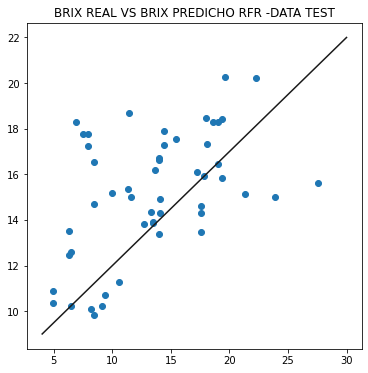

In [ ]:
entrada = pd.read_excel('DATA PRUEBA.xlsx')
pred = modeloRFR.predict(entrada)
pred_1 = modeloSGBR.predict(entrada)

df_prueba_2 = pd.read_excel('DATA PRUEBA_2.xlsx')
brix = df_prueba_2 ['Brix']
np_brix = np.array(brix)

fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(np_brix,pred)
ax.plot([4,30],[9,22],ls='-',c ="0.1")
ax.set_title('BRIX REAL VS BRIX PREDICHO RFR -DATA TEST')


Text(0.5, 1.0, 'BRIX REAL VS BRIX PREDICHO SGBR -DATA TEST')

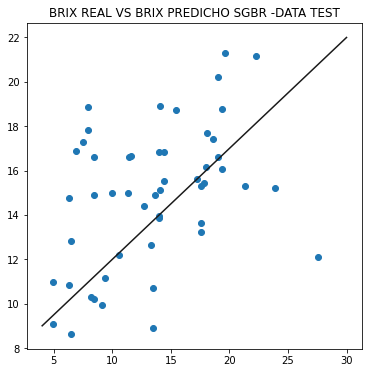

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(np_brix,pred_1)
ax.plot([4,30],[9,22],ls='-',c ="0.1")
ax.set_title('BRIX REAL VS BRIX PREDICHO SGBR -DATA TEST')